I need to make the case/establish the baseline of connection between sites, before I say there's something special about throat/lung.

Basically, Eric didn't believe that gastric and lung are similar. Needed to show him that the most abundant things (on average) in all sites is pretty similar.

Added value of our dataset is that we have intra-patient data...

- can I classify body sites?
- PCA colored by site
- heatmap of relative abundances for all 3 sites



In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import MDS

# to pretty print dataframes
from IPython.display import display

In [198]:
# Raw data
fnotu = '/Users/claire/github/aspiration-analysis/data/clean/rosen.otu_table.clean'
fnmeta = '/Users/claire/github/aspiration-analysis/data/clean/rosen.metadata.clean'

df = pd.read_csv(fnotu, sep='\t', index_col=0)
meta = pd.read_csv(fnmeta, sep='\t', index_col=0)

# JSD
fnjsd = '/Users/claire/github/aspiration-analysis/data/analysis/jsd.txt'
jsd = pd.read_csv(fnjsd, sep='\t').dropna(how='all', axis=1)

# Seed random state
random_state = 12345

# PCA colored by body site

In [88]:
jsd.head()

,sample1,sample2,jsd,site1,site2,site_comparison,patient_comp,subject,Results of MBS closest to enrollment date,Results of worst MBS,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
0,01-112-7GI,01-112-7RI,0.399298,gastric_fluid,rectal_swab,gastric_rectalswab,within,01-112-7,NaN,NaN,...,n/a,n/a,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN
1,01-112-7GI,01-112-7TI,0.991109,gastric_fluid,throat_swab,throat_gastric,within,01-112-7,NaN,NaN,...,n/a,n/a,n/a,n/a,n/a,n/a,NaN,NaN,NaN,NaN
2,01-112-7GI,01-164-7GI,0.991680,gastric_fluid,gastric_fluid,gastric_gastric,between,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-112-7GI,01-164-7RI,0.573924,gastric_fluid,rectal_swab,gastric_rectalswab,between,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-112-7GI,01-164-7TI,0.993451,gastric_fluid,throat_swab,throat_gastric,between,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
jsd_mat = jsd.pivot(index='sample1', columns='sample2', values='jsd')
jsd_mat.head()

sample2,01-112-7RI,01-112-7TI,01-164-7GI,01-164-7RI,01-164-7TI,01-165-8SI,01-173-4G,01-173-4R,01-173-4T,01-200-1SF,...,52-8-TF,52-8-TI,55-1-TF,55-1-TI,56-3-TF,56-3-TI,57-9-TI,58-4-TI,dup05-013-1B,dup05-013-1G
sample1,,,,,,,,,,,,,,,,,,,,,
01-112-7GI,0.399298,0.991109,0.991680,0.573924,0.993451,0.685657,0.990885,0.900538,0.990829,0.930851,...,0.988555,0.995720,0.992307,0.990624,0.992248,0.994312,0.991729,0.994854,0.998160,0.997789
01-112-7RI,NaN,0.987175,0.988484,0.651295,0.990102,0.725515,0.987909,0.918016,0.986797,0.927054,...,0.987371,0.995020,0.990520,0.986919,0.990171,0.993238,0.990972,0.990952,0.997729,0.997368
01-112-7TI,NaN,NaN,0.363635,0.993774,0.375029,0.994844,0.609620,0.974317,0.583215,0.965133,...,0.845369,0.827649,0.820820,0.680207,0.748027,0.825291,0.746427,0.667976,0.997279,0.952024
01-164-7GI,NaN,NaN,NaN,0.993498,0.091681,0.994491,0.648384,0.976771,0.621266,0.969540,...,0.900529,0.871660,0.900244,0.762818,0.810064,0.907248,0.771379,0.638415,0.997193,0.968423
01-164-7RI,NaN,NaN,NaN,NaN,0.995157,0.624842,0.994166,0.867626,0.994637,0.926053,...,0.993738,0.996807,0.996595,0.994554,0.996227,0.997398,0.994715,0.994303,0.998157,0.997957


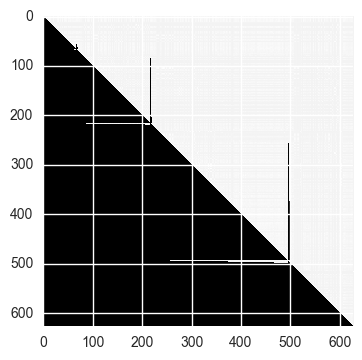

In [90]:
# I didn't redundantly calculate JSD, so only half of this table is filled in...
# black boxes are NaNs
plt.imshow(jsd_mat.fillna(10), interpolation='nearest')

In [91]:
jsd_mat.shape

(627, 627)

In [92]:
[i for i in jsd_mat.index if i not in jsd_mat.columns]

['01-112-7GI']

In [93]:
[i for i in jsd_mat.columns if i not in jsd_mat.index]

['dup05-013-1G']

In [94]:
missing_cols = [i for i in jsd_mat.index if i not in jsd_mat.columns]
for col in missing_cols:
    jsd_mat[col] = np.nan
missing_rows = [i for i in jsd_mat.columns if i not in jsd_mat.index]
for row in missing_rows:
    jsd_mat.loc[row] = np.nan

In [95]:
jsd_mat.shape

(628, 628)

In [96]:
# This takes a long time... Could probably figure out a better way using
# numpy but don't wanna do it right now...
# If jsd_mat.loc[i, j] is nan, replace it with jsd_mat.loc[j, i]
for i in jsd_mat.index:
    for j in jsd_mat.columns:
        if i == j:
            jsd_mat.loc[i, j] = 0
        elif pd.isnull(jsd_mat.loc[i, j]):
            if pd.notnull(jsd_mat.loc[j, i]):
                jsd_mat.loc[i, j] = jsd_mat.loc[j, i]
            else:
                print(i, j)

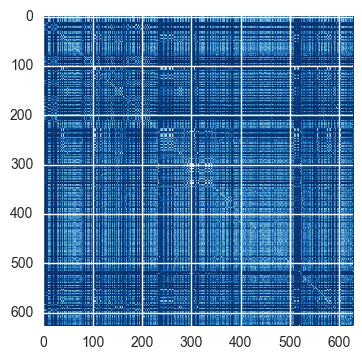

In [98]:
plt.imshow(jsd_mat.fillna(10), interpolation='nearest', cmap="Blues")

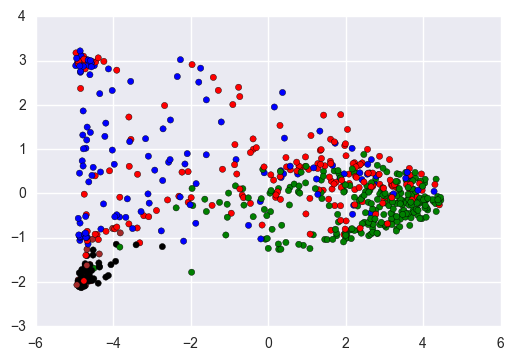

In [125]:
# Prepare colors
sites = ['gastric_fluid', 'rectal_swab', 'throat_swab', 'stool', 'bal']
colors = ['red', 'brown', 'green', 'black', 'blue']
colordict = {i: k for i, k in zip(sites, colors)}


#Parameters:
#X : array-like, shape (n_samples, n_features)
#Training data, where n_samples is the number of samples and n_features is the number of features.
#Returns:
#X_new : array-like, shape (n_samples, n_components)

Y = PCA().fit_transform(jsd_mat)
Y = pd.DataFrame(Y, index=jsd_mat.index, columns=range(0, Y.shape[1]))

color_vect = [colordict[meta.loc[i, 'site']] for i in jsd_mat.index]
plt.scatter(Y.iloc[:, 0], Y.iloc[:, 1], c=color_vect)

In [129]:
x = Y.iloc[:, 0] < -4 
y = Y.iloc[:, 1] < -1
indices = [i for i in range(len(x)) if x[i] and y[i]]

In [130]:
jsd_mat.index[indices]

Index([u'01-112-7GI', u'01-112-7RI', u'01-164-7RI', u'01-165-8SI',
       u'01-173-4R', u'01-215-7R', u'01-230-9GF', u'01-230-9GI', u'01-230-9RF',
       u'01-230-9RI', u'01-247-3R', u'01-263-4GI', u'01-263-4RI',
       u'01-263-4TF', u'01-263-4TI', u'01-270-3R', u'03-055-1SF',
       u'03-055-1SI', u'03-069-2SF', u'03-069-2SI', u'03-076-8-B-SF',
       u'03-076-8SI', u'03-085-9SF', u'03-085-9SI', u'03-088-2SF',
       u'03-088-2SI', u'03-105-8SF', u'03-105-8SI', u'03-114-2SF',
       u'03-114-2SI', u'03-115-7SF', u'03-115-7SI', u'03-116-1SF',
       u'03-116-1SI', u'03-125-1SF', u'03-125-1SI', u'03-138-9SF',
       u'03-138-9SI', u'03-144-7SF', u'03-146-6SF', u'03-146-6SI',
       u'03-149-1SI', u'03-150-8SF', u'03-150-8SI', u'03-153-7SF',
       u'03-153-7SI', u'03-156-7SF', u'03-156-7SI', u'03-178-6SF',
       u'03-178-6SI', u'03-181-7SF', u'03-181-7SI', u'03-182-8SF',
       u'03-199-7SI', u'03-225-1SF', u'03-225-1SI', u'03-225-1Ssick',
       u'03-226-4SF', u'03-226-4SI', u'03-272

In [131]:
meta.loc[jsd_mat.index[indices], 'site']

sample1
01-112-7GI       gastric_fluid
01-112-7RI         rectal_swab
01-164-7RI         rectal_swab
01-165-8SI               stool
01-173-4R          rectal_swab
01-215-7R          rectal_swab
01-230-9GF       gastric_fluid
01-230-9GI       gastric_fluid
01-230-9RF         rectal_swab
01-230-9RI         rectal_swab
01-247-3R          rectal_swab
01-263-4GI       gastric_fluid
01-263-4RI         rectal_swab
01-263-4TF         throat_swab
01-263-4TI         throat_swab
01-270-3R          rectal_swab
03-055-1SF               stool
03-055-1SI               stool
03-069-2SF               stool
03-069-2SI               stool
03-076-8-B-SF            stool
03-076-8SI               stool
03-085-9SF               stool
03-085-9SI               stool
03-088-2SF               stool
03-088-2SI               stool
03-105-8SF               stool
03-105-8SI               stool
03-114-2SF               stool
03-114-2SI               stool
                     ...      
03-150-8SF               stool


In [132]:
x = Y.iloc[:, 0] < -4 
y = Y.iloc[:, 1] > 2.5
indices = [i for i in range(len(x)) if x[i] and y[i]]
jsd_mat.index[indices]

Index([u'02-096-6B', u'02-098-5B', u'02-098-5G', u'02-111-4B', u'03-089-3G',
       u'03-094-5B', u'03-094-5G', u'03-102-4B', u'03-102-4G', u'03-105-2B',
       u'03-107-4B', u'03-113-4B', u'04-011-3G', u'04-029-8B', u'04-029-8G',
       u'04-032-7G', u'04-036-5G', u'04-042-7B', u'04-047-2G', u'04-054-3G',
       u'04-061-8B', u'04-062-8B', u'04-062-8G', u'04-064-5B', u'04-084-1B',
       u'05-003-7B', u'05-009-2G', u'12-100-3B', u'12-100-3G', u'13-104-0B',
       u'13-106-3B', u'13-110-5B', u'14-111-4B'],
      dtype='object', name=u'sample1')

In [136]:
meta.loc[jsd_mat.index[indices]].dropna(how='all', axis=1)

,% time pH<4,AIM1?,AIM2?,AIM3?,Arching,Arching - Total number of episodes,Cough,Cough - total number of episodes,Cystic Fibrosis?,Date Form Completed,...,SAMPLEID,STUDYID,STUDY,AIM,SOURCE,PHMII,ACIDSUP,DATE,ppi_consolidated,mbs_consolidated
sample1,,,,,,,,,,,,,,,,,,,,,
02-096-6B,3.6,No,Yes,No,No,n/a,Yes,17,NaN,2011-03-07,...,02-096-6B,02-096-6,K23,Aim 2,BAL (Bronchoalveolar Lavage),Yes,Off,1.352877e+10,off,Normal
02-098-5B,18.3,No,Yes,No,No,n/a,Yes,41,NaN,2011-05-03,...,02-098-5B,02-098-5,K23,Aim 2,BAL (Bronchoalveolar Lavage),Yes,Off,1.352877e+10,off,Normal
02-098-5G,18.3,No,Yes,No,No,n/a,Yes,41,NaN,2011-05-03,...,02-098-5G,02-098-5,K23,Aim 2,Gastric Fluid,Yes,Off,1.352877e+10,off,Normal
02-111-4B,1.9,No,Yes,No,No,n/a,Yes,16,NaN,2012-02-20,...,02-111-4B,02-111-4,K23,Aim 2,BAL (Bronchoalveolar Lavage),Yes,Off,1.357042e+10,off,Normal
03-089-3G,7.8,No,Yes,Yes,No,n/a,Yes,19,NaN,2010-09-20,...,03-089-3G,03-089-3,K23,Aim 2,Gastric Fluid,Yes,Off,1.352877e+10,off,Aspiration/Penetration
03-094-5B,2.4,No,Yes,Yes,No,n/a,Yes,43,NaN,2011-03-23,...,03-094-5B,03-094-5,K23,Aim 2,BAL (Bronchoalveolar Lavage),Yes,Off,1.352877e+10,off,Aspiration/Penetration
03-094-5G,2.4,No,Yes,Yes,No,n/a,Yes,43,NaN,2011-03-23,...,03-094-5G,03-094-5,K23,Aim 2,Gastric Fluid,Yes,Off,1.352877e+10,off,Aspiration/Penetration
03-102-4B,6.2,No,Yes,Yes,No,n/a,Yes,16,NaN,2012-02-20,...,03-102-4B,03-102-4,K23,Aim 2,BAL (Bronchoalveolar Lavage),Yes,Off,1.352877e+10,off,Aspiration/Penetration
03-102-4G,6.2,No,Yes,Yes,No,n/a,Yes,16,NaN,2012-02-20,...,03-102-4G,03-102-4,K23,Aim 2,Gastric Fluid,Yes,Off,1.352877e+10,off,Aspiration/Penetration


In [138]:
meta.loc[jsd_mat.index[indices], 'batch']

sample1
02-096-6B    2014
02-098-5B    2014
02-098-5G    2014
02-111-4B    2014
03-089-3G    2014
03-094-5B    2014
03-094-5G    2014
03-102-4B    2014
03-102-4G    2014
03-105-2B    2014
03-107-4B    2014
03-113-4B    2014
04-011-3G    2014
04-029-8B    2014
04-029-8G    2014
04-032-7G    2014
04-036-5G    2014
04-042-7B    2014
04-047-2G    2014
04-054-3G    2014
04-061-8B    2014
04-062-8B    2014
04-062-8G    2014
04-064-5B    2014
04-084-1B    2014
05-003-7B    2014
05-009-2G    2014
12-100-3B    2014
12-100-3G    2014
13-104-0B    2014
13-106-3B    2014
13-110-5B    2014
14-111-4B    2014
Name: batch, dtype: int64

## Re-make PCA without any stool or rectal swab samples


/Users/claire/anaconda/lib/python2.7/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


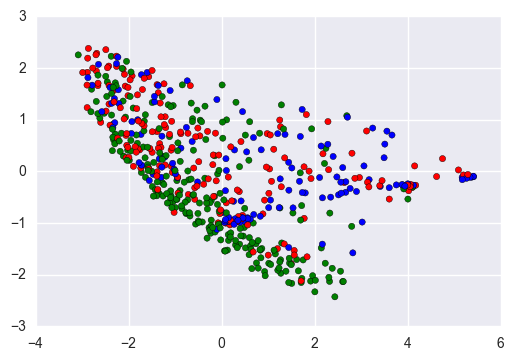

In [147]:
# Prepare colors
sites = ['gastric_fluid', 'throat_swab', 'bal']
colors = ['red', 'green', 'blue']
colordict = {i: k for i, k in zip(sites, colors)}

# Keep only patinets with those sites
keep_smpls = meta.query('site == @sites').index
jsd_mat_aerosites = jsd_mat.loc[keep_smpls, keep_smpls]

#Parameters:
#X : array-like, shape (n_samples, n_features)
#Training data, where n_samples is the number of samples and n_features is the number of features.
#Returns:
#X_new : array-like, shape (n_samples, n_components)

Y_mds = MDS().fit_transform(jsd_mat_aerosites)
Y_mds = pd.DataFrame(Y_mds, index=jsd_mat_aerosites.index, columns=range(0, Y_mds.shape[1]))

color_vect = [colordict[meta.loc[i, 'site']] for i in jsd_mat_aerosites.index]
plt.scatter(Y_mds.iloc[:, 0], Y.iloc[:, 1], c=color_vect)

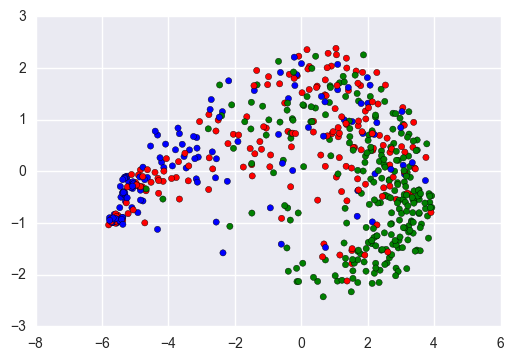

In [148]:
Y = PCA().fit_transform(jsd_mat_aerosites)
Y = pd.DataFrame(Y, index=jsd_mat_aerosites.index, columns=range(0, Y.shape[1]))

color_vect = [colordict[meta.loc[i, 'site']] for i in jsd_mat_aerosites.index]
plt.scatter(Y.iloc[:, 0], Y.iloc[:, 1], c=color_vect)

### Why is there such a tight cluster of samples??

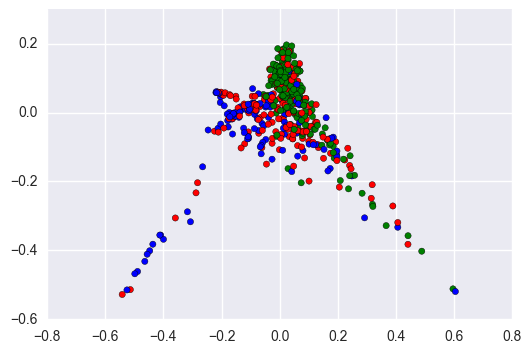

In [161]:
## Let's try PCA just on the OTU table...

pca_otu = PCA().fit(df.loc[keep_smpls])
Y_otu = pca_otu.transform(df.loc[keep_smpls])
Y_otu = pd.DataFrame(Y_otu, index=jsd_mat_aerosites.index, columns=range(0, Y_otu.shape[1]))

color_vect = [colordict[meta.loc[i, 'site']] for i in keep_smpls]
plt.scatter(Y_otu.iloc[:, 0], Y_otu.iloc[:, 1], c=color_vect)

## What's going on with these samples?

Maybe read depth? It's been a long time since I checked that...

In [168]:
pcs = pd.DataFrame(columns=df.columns, index=['PC' + str(i) for i in range(len(Y_otu))], data=pca_otu.components_).T

In [171]:
pcs['PC0'].sort_values()

k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__;g__;s__;d__denovo34                                                           -0.492581
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Enterobacter;s__;d__denovo40      -0.203755
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo6                         -0.178433
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo15                         -0.149677
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus;s__;d__denovo96                           -0.101757
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Leuconostocaceae;g__Leuconostoc;s__;d__denovo98                           -0.097552
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__;d__denovo178           -0.073225

In [183]:
# Color the points by the two top features (denovo1 = 0.73, denovo34 = -0.49)
o = ['k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1',
     'k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__;g__;s__;d__denovo34']
cval = df.loc[keep_smpls, o].sum(axis=1).astype(float)

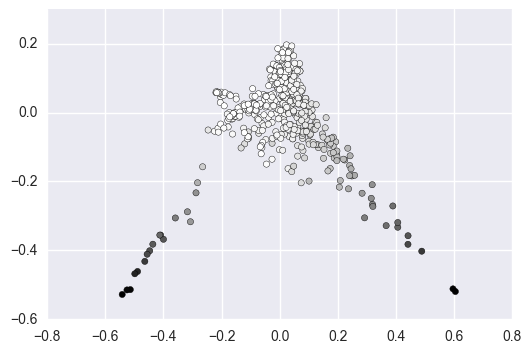

In [188]:
plt.scatter(Y_otu.iloc[:, 0], Y_otu.iloc[:, 1], c=cval.values)

In [199]:
tmp = pd.DataFrame(cval, columns=['denovo1_denovo34'])
tmp['pc1'] = Y_otu.iloc[:, 0]
tmp['pc2'] = Y_otu.iloc[:, 1]
tmp['total_reads'] = meta.loc[Y_otu.index, 'total_reads']
tmp.sort_values(by='pc1')

,denovo1_denovo34,pc1,pc2,total_reads
13-115-1G,0.931910,-0.541984,-0.527932,19900
04-087-1B,0.912891,-0.525547,-0.514768,22271
04-071-9G,0.913296,-0.514064,-0.513858,33078
04-072-1B,0.824824,-0.498665,-0.467875,18764
04-071-9B,0.815712,-0.489217,-0.461227,21716
03-124-8B,0.763988,-0.464195,-0.431877,34672
03-123-6B,0.723144,-0.456140,-0.411183,17547
03-122-5B,0.708018,-0.447387,-0.401083,3966
02-120-4B,0.670695,-0.436584,-0.382062,11087
13-117-4B,0.629588,-0.412556,-0.355531,5367


#### Look to see if those most abundant OTUs are also in other samples (to answer whether they're normal members of the flora or likely contaminents)

In [221]:
site = 'bal'

# Grab just bal samples
bal_df = df.loc[meta.query('site == @site').index]
# Drop any OTUs which are all zero
bal_df = bal_df.loc[:, (bal_df.sum() > 0)]
# Sort OTUs by mean abundance across all samples
bal_df = bal_df[bal_df.mean().sort_values().index]

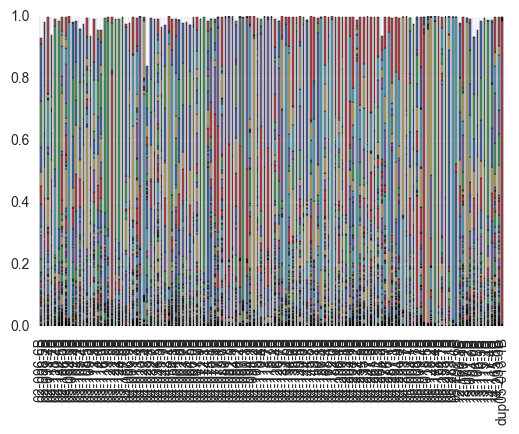

In [222]:
bal_df.plot(kind='bar', stacked=True, legend=False)

### This is clearly ridiculous...

To do: plot just the samples that have all 3 sites

In [233]:
sites = ['bal', 'gastric_fluid', 'throat_swab']
meta.query('site == @sites').groupby(['subject_id']).size().unique()

array([2, 1, 3])

In [252]:
keep_subjs = meta.query('site == @sites').groupby(['subject_id']).size() == 3
# Inception. https://stackoverflow.com/questions/28859284/pandas-keep-only-true-values-after-groupby-a-dataframe
keep_subjs = keep_subjs[keep_subjs]
keep_subjs.head()

subject_id
01-230-9    True
01-263-4    True
02-096-6    True
02-098-5    True
02-099-7    True
dtype: bool

In [253]:
keep_subjs = keep_subjs.index.tolist()
keep_samples = meta.query('subject_id == @keep_subjs').index
keep_samples

Index([u'01-230-9GF', u'01-230-9GI', u'01-230-9RF', u'01-230-9RI',
       u'01-230-9TF', u'01-263-4GI', u'01-263-4RI', u'01-263-4TF',
       u'01-263-4TI', u'02-096-6B',
       ...
       u'13-115-1T', u'13-117-4B', u'13-117-4G', u'13-117-4T', u'14-111-4B',
       u'14-111-4G', u'14-111-4T', u'14-233-0B', u'14-233-0G', u'14-233-0T'],
      dtype='object', length=273)

In [254]:
three_sites_df = df.loc[keep_samples]

In [276]:
site = 'bal'

# Grab just bal samples
bal_df = three_sites_df.loc[meta.loc[keep_samples].query('site == @site').index]
# Drop any OTUs which are all zero
bal_df = bal_df.loc[:, (bal_df.sum() > 0)]
# Sort OTUs by mean abundance across all samples
bal_df = bal_df[bal_df.mean().sort_values(ascending=False).index]
# Sort samples by mean abundance of the most abundant OTU
bal_df = bal_df.sort_values(by=list(bal_df.mean(axis=0).index[0:10]))

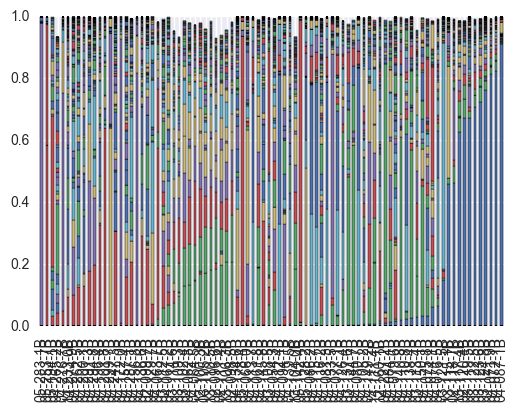

In [279]:
bal_df.plot(kind='bar', stacked=True, legend=False)

In [281]:
site = 'gastric_fluid'

# Grab just bal samples
gas_df = three_sites_df.loc[meta.loc[keep_samples].query('site == @site').index]
# Drop any OTUs which are all zero
gas_df = gas_df.loc[:, (gas_df.sum() > 0)]
# Sort OTUs by mean abundance across all samples (first)
gas_df = gas_df[gas_df.mean().sort_values(ascending=False).index]
# Sort OTUs by order in BAL dataframe (and then by the sorted ones)
gas_otus = [i for i in bal_df.columns if i in gas_df.columns]
gas_otus += [i for i in gas_df.columns if i not in gas_otus]
gas_df = gas_df[gas_otus]
# Sort samples in same order as BAL dataframe
s2subj = dict(zip(meta.index, meta['subject_id']))
bal2gas = {}
for s in bal_df.index:
    subj = s2subj[s]
    gas_s = meta.query('subject_id == @subj').query('site == @site').index[0]
    bal2gas[s] = gas_s

gas_df = gas_df.loc[[bal2gas[i] for i in bal_df.index]]


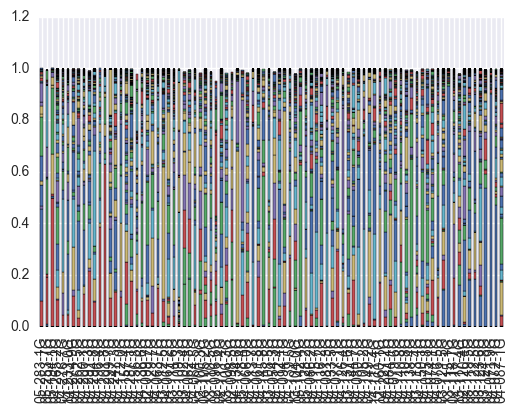

In [282]:
gas_df.plot(kind='bar', stacked=True, legend=False)

In [283]:
site = 'throat_swab'

# Grab just bal samples
thr_df = three_sites_df.loc[meta.loc[keep_samples].query('site == @site').index]
# Drop any OTUs which are all zero
thr_df = thr_df.loc[:, (thr_df.sum() > 0)]
# Sort OTUs by mean abundance across all samples (first)
thr_df = thr_df[thr_df.mean().sort_values(ascending=False).index]
# Sort OTUs by order in BAL dataframe (and then by the sorted ones)
thr_otus = [i for i in bal_df.columns if i in thr_df.columns]
thr_otus += [i for i in thr_df.columns if i not in thr_otus]
thr_df = thr_df[thr_otus]
# Sort samples in same order as BAL dataframe
s2subj = dict(zip(meta.index, meta['subject_id']))
bal2thr = {}
for s in bal_df.index:
    subj = s2subj[s]
    thr_s = meta.query('subject_id == @subj').query('site == @site').index[0]
    bal2thr[s] = thr_s

thr_df = thr_df.loc[[bal2thr[i] for i in bal_df.index]]


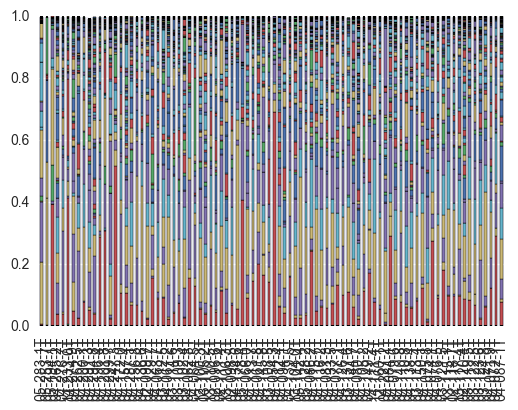

In [284]:
thr_df.plot(kind='bar', stacked=True, legend=False)

## TODO: re-do these plots at genus level or something

Obviously these bar plots look crazy right now... DOH! Collapse to genus or family level and re-plot. This plot will clearly show how related things are, I think.

Still not sure what to do with the few samples which are overrun by a few OTUs...